# Correlational analysis of the dataset: shallow study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = '../../DATASET/Housing.csv'

## Dataset basic manipulation
- loading
- view data

In [3]:
# Load the dataset
df = pd.read_csv(dataset)

# Show basic info about the dataset
print(df.info())
print("===================================================")
# Show basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

### check missing values

In [4]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### correlation matrix

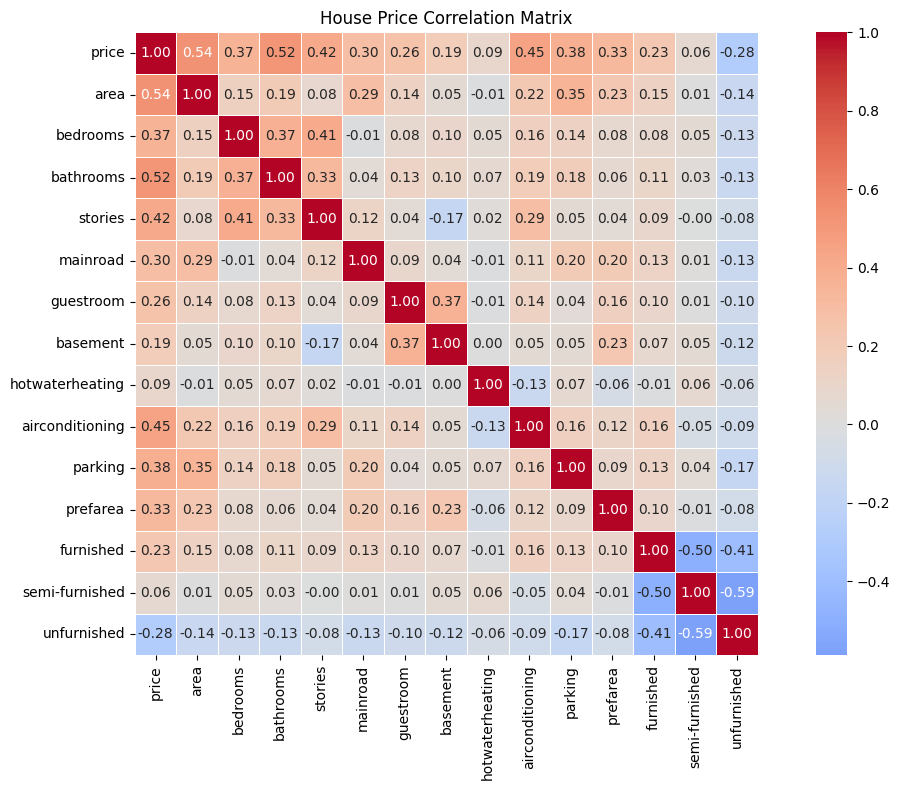


Strong correlations (|correlation| > 0.5):
price           area              0.535997
area            price             0.535997
price           bathrooms         0.517545
bathrooms       price             0.517545
semi-furnished  unfurnished      -0.588405
unfurnished     semi-furnished   -0.588405
dtype: float64


In [5]:
# Convert binary categorical variables to numeric
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Create binary columns for furnishing status manually
df['furnished'] = (df['furnishingstatus'] == 'furnished').astype(int)
df['semi-furnished'] = (df['furnishingstatus'] == 'semi-furnished').astype(int)
df['unfurnished'] = (df['furnishingstatus'] == 'unfurnished').astype(int)

# Drop the original furnishingstatus column
df = df.drop('furnishingstatus', axis=1)

# Calculate correlation matrix
correlation_matrix_TOTAL = df.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_TOTAL, 
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',           # Display 2 decimal places
            square=True,         # Make the plot square-shaped
            linewidths=0.5)      # Add gridlines

plt.title('House Price Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strongest correlations (absolute value > 0.5)
print("\nStrong correlations (|correlation| > 0.5):")
strong_corr = correlation_matrix_TOTAL.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.5]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
print(strong_corr.sort_values(ascending=False))

## strong correlations: focusing on the important values
Lets focus on different thresholds to set a minimal value. in this case we will be looking the following correlational values:
- 0.4
- 0.3
- 0.25

In [6]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create mask for correlations less than 0.4 (absolute value)
mask_040 = np.abs(correlation_matrix) < 0.4
mask_030 = np.abs(correlation_matrix) < 0.3
mask_025 = np.abs(correlation_matrix) < 0.25
mask_020 = np.abs(correlation_matrix) < 0.20
mask_015 = np.abs(correlation_matrix) < 0.15

### Correlation matrix: 0.4 threshold

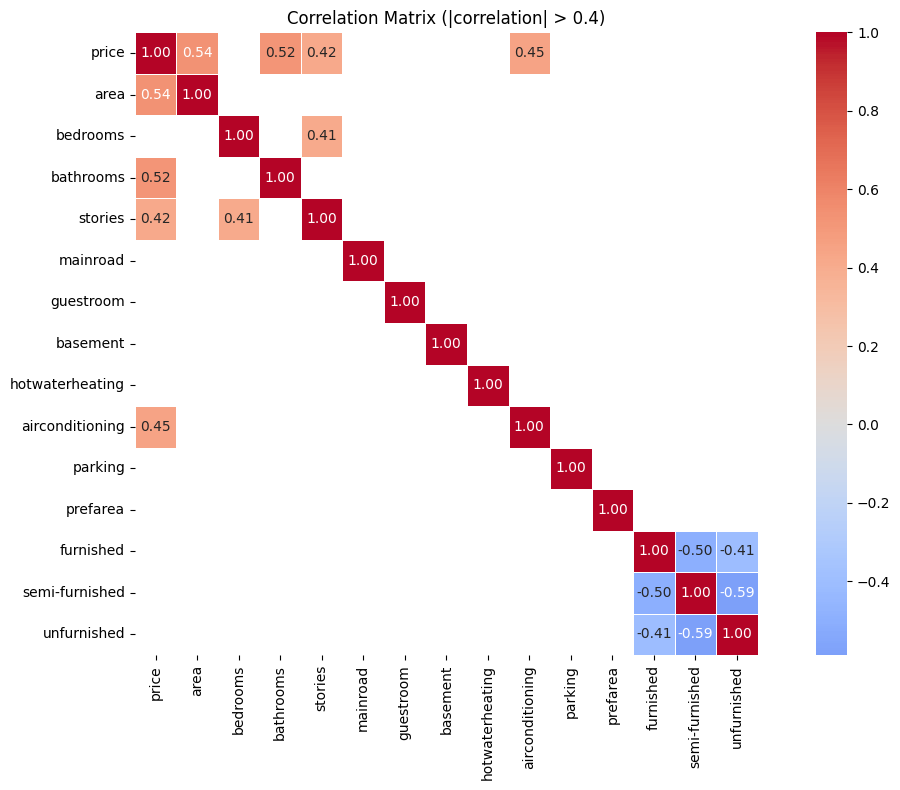


Correlations (|correlation| > 0.4):
Number of correlations above 0.40: 16
Percentage of total possible correlations: 15.24%


In [7]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_040)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.4)')
plt.tight_layout()
plt.show()

# Print correlations above 0.4
print("\nCorrelations (|correlation| > 0.4):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.4]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.40: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.3 threshold

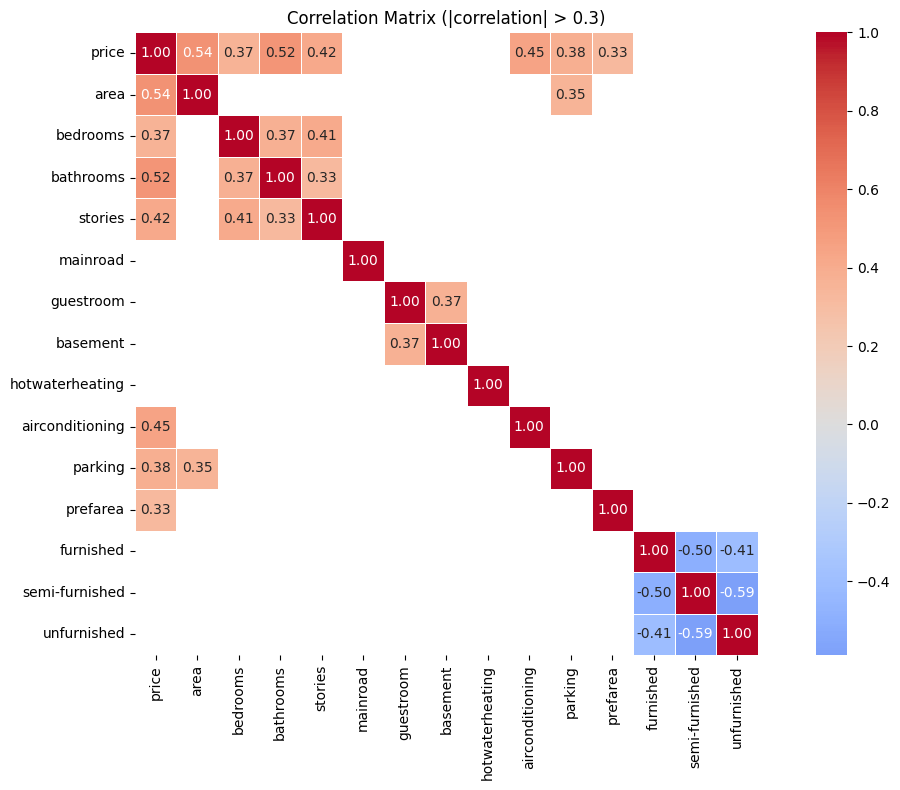


Correlations (|correlation| > 0.3):
Number of correlations above 0.30: 30
Percentage of total possible correlations: 28.57%


In [8]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_030)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.3)')
plt.tight_layout()
plt.show()

# Print correlations above 0.3
print("\nCorrelations (|correlation| > 0.3):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.3]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.30: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.25 threshold

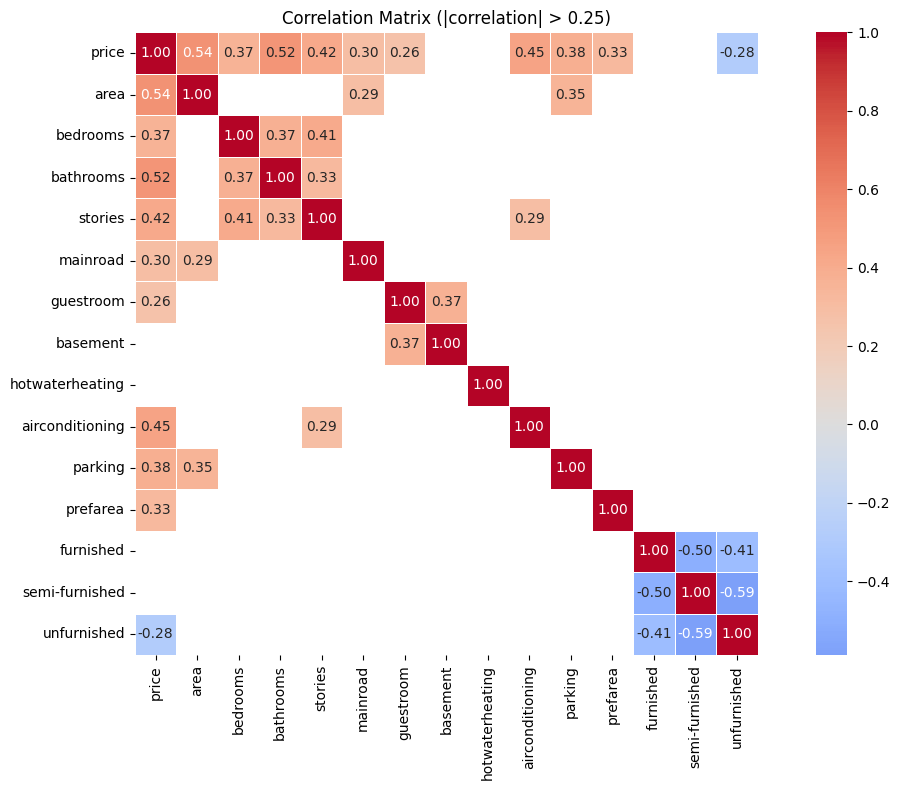


Correlations (|correlation| > 0.25):
Number of correlations above 0.25: 40
Percentage of total possible correlations: 38.10%


In [9]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_025)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.25)')
plt.tight_layout()
plt.show()

# Print correlations above 0.25
print("\nCorrelations (|correlation| > 0.25):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.25]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.25: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.20 threshold

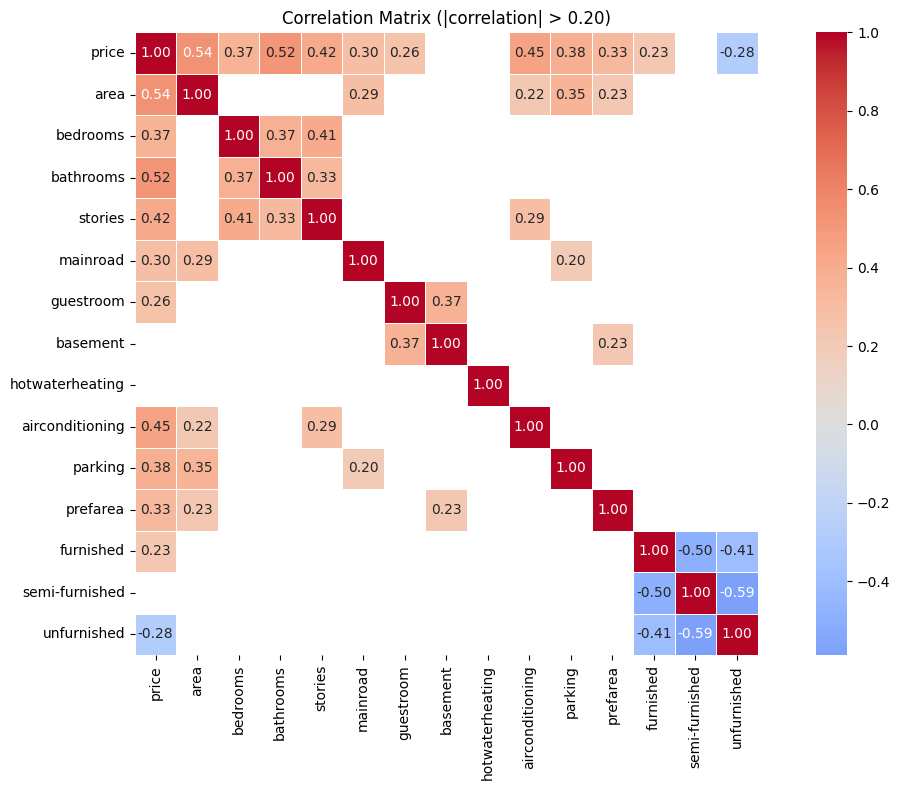


Correlations (|correlation| > 0.20):
Number of correlations above 0.20: 50
Percentage of total possible correlations: 47.62%


In [10]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_020)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.20)')
plt.tight_layout()
plt.show()

# Print correlations above 0.20
print("\nCorrelations (|correlation| > 0.20):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.20]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.20: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

### Correlation matrix: 0.15 threshold

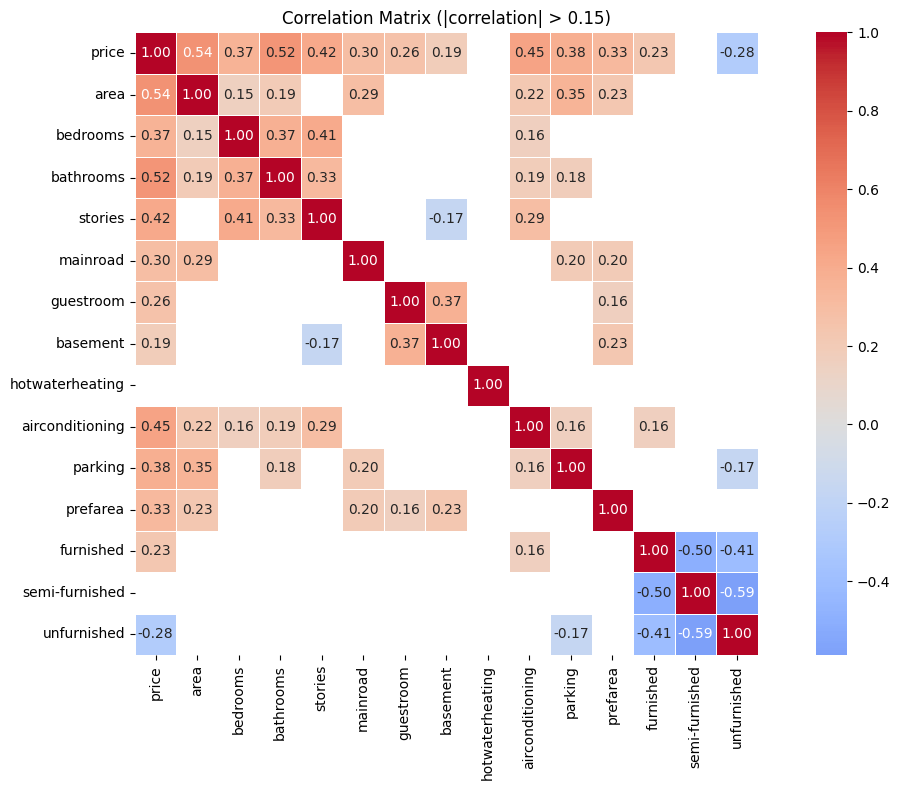


Correlations (|correlation| > 0.15):
Number of correlations above 0.15: 74
Percentage of total possible correlations: 70.48%


In [11]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          
            cmap='coolwarm',     
            center=0,            
            fmt='.2f',           
            square=True,         
            linewidths=0.5,
            mask=mask_015)           # Apply the mask to hide low correlations

plt.title('Correlation Matrix (|correlation| > 0.15)')
plt.tight_layout()
plt.show()

# Print correlations above 0.15
print("\nCorrelations (|correlation| > 0.15):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > 0.15]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations
# print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.15: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")

## Correlation matrix: conclusions
As the threshold for correlation increases, the number of significant relationships decreases. This indicates a trade-off between capturing more variables and ensuring stronger, more meaningful correlations.

With a threshold of 0.15, we retain 70.48% of the possible correlations, which allows us to capture a broad range of variables, potentially including weaker ones. This means that by keeping a lower threshold, we are likely incorporating many variables that might not have a strong individual impact but could still play a role in predicting the target variable.

As we increase the threshold to 0.20, the percentage drops to 47.62%. This suggests that we are now focusing on a more concise set of relationships, which are stronger but fewer in number. At this level, we are eliminating some of the weaker variables, which could result in a more efficient model, but with potentially less diversity in the relationships considered.

At a threshold of 0.25, the number of correlations further decreases to 38.10%, indicating that we are narrowing our focus even more. While the correlations retained are likely to be stronger, this could limit the model's ability to leverage more subtle relationships between variables.

At higher thresholds, such as 0.30 and 0.40, the percentage of relationships further shrinks to 28.57% and 15.24%, respectively. These thresholds only retain the most impactful correlations, which can help improve model accuracy by focusing solely on the strongest predictors. However, this comes at the cost of losing potentially valuable, albeit weaker, correlations that may still contribute to the overall predictive power.

These results suggest that for a more robust and interpretable model, higher thresholds may be beneficial. However, the trade-off is the risk of losing potentially valuable, weaker correlations that could improve model performance in certain contexts.

## Final model: 0.20 threshold
Based on the results from the correlation matrix and the threshold analysis, the model for the first phase of the project will use a **0.20** correlation threshold. This threshold strikes a good balance between retaining a sufficient number of relationships and maintaining their strength, allowing the model to focus on the most relevant variables while avoiding weak relationships that could introduce noise. By keeping only the more significant correlations, the model will work with a more focused and efficient dataset, which will aid in training and reduce the risk of overfitting. Furthermore, this threshold choice will allow for the evaluation of the model's predictive capability with a set of stronger variables, aligning with the project's goal of improving accuracy and maximizing performance in predicting housing prices.

In [38]:
# Calculate correlation matrix
threshold = 0.20 # Set the threshold based on your analysis
correlation_matrix = df.corr()

# Create mask for correlations less than threshold (absolute value)
final_mask = np.abs(correlation_matrix) < threshold

# # Create heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, 
#             annot=True,          
#             cmap='coolwarm',     
#             center=0,            
#             fmt='.2f',           
#             square=True,         
#             linewidths=0.5,
#             mask=final_mask)           # Apply the mask to hide low correlations
# 
# # plt.title("Correlation matrix (|correlation| > ", threshold, ")")
# plt.tight_layout()
# plt.show()

# Print correlations above treshold
print("\nCorrelations (|correlation| > ", threshold, "):")
strong_corr = correlation_matrix.unstack()
strong_corr = strong_corr[abs(strong_corr) > threshold]
strong_corr = strong_corr[strong_corr != 1.0]  # Remove self-correlations

print(strong_corr.sort_values(ascending=False))

num_relations = len(strong_corr)
total_possible = len(correlation_matrix) * (len(correlation_matrix) - 1) / 2  # Total possible pairs
percentage = (num_relations / total_possible) * 100

print(f"Number of correlations above 0.40: {num_relations}")
print(f"Percentage of total possible correlations: {percentage:.2f}%")


Correlations (|correlation| >  0.2 ):
price            area               0.535997
area             price              0.535997
price            bathrooms          0.517545
bathrooms        price              0.517545
airconditioning  price              0.452954
price            airconditioning    0.452954
                 stories            0.420712
stories          price              0.420712
                 bedrooms           0.408564
bedrooms         stories            0.408564
parking          price              0.384394
price            parking            0.384394
bedrooms         bathrooms          0.373930
bathrooms        bedrooms           0.373930
guestroom        basement           0.372066
basement         guestroom          0.372066
bedrooms         price              0.366494
price            bedrooms           0.366494
area             parking            0.352980
parking          area               0.352980
prefarea         price              0.329777
price           

In [39]:
# Filter the features that are correlated above the threshold
threshold = 0.20  # Set the threshold based on your analysis
selected_features = list(strong_corr.index)

# Remove self-correlations (correlation with themselves, which will always be 1)
selected_features = [feature for feature in selected_features if feature[0] != feature[1]]

# Now, we can create a new dataset with only the selected features
selected_columns = list(set([feature[0] for feature in selected_features] + [feature[1] for feature in selected_features]))

# Create a new DataFrame with the selected features
selected_data = df[selected_columns]

# Export the dataset to a CSV file
selected_data.to_csv('selected_features_dataset.csv', index=False)

# Print confirmation
print(f"Dataset with selected features has been exported to 'selected_features_dataset.csv'.")

Dataset with selected features has been exported to 'selected_features_dataset.csv'.
